# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [1]:
import numpy
from matplotlib import pyplot as plt

In [2]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [3]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    return numpy.pi*r_cb**2

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    return (4/3)*(numpy.pi)*r_cb**3*(rho_iron)

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [4]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [8]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_t, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    
    
    dx_dt=vx
    dy_dt=vy
    dvx_dt=-(1/(2*mass_cb))*kappa*rho_air*area_cb*(vx**2+vy**2)*vx/((vx**2+vy**2)**0.5
    dvy_dt=-(1/(2*mass_cb))*kappa*rho_air*area_cb*((vx**2+vy**2)**0.5)*vy-g
    
    print(dvx_dt)
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])

r_test = [0, 0, 88.38834764831843, 88.38834764831843]

f(r_test,0)

-2.0279282994464727


array([ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ])

Check your result:

In [9]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

-2.0279282994464727


In [10]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

-2.0279282994464727


## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [48]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    # you should now populate the history array
    # YOUR CODE HERE
    dt=t1/n_steps
    
    for i in range (0, n_steps):
        history[i+1]=history[i]+dt*f(history[i],dt*i)

        
    return history


Test your solution:

In [49]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

-2.0279282994464727
-1.559472607060644
-1.2455570505391753
-1.0717581742881002
-1.0274816349939024
-1.082126540961402
-1.1896949314392742
-1.309695507574876
-1.415591029240351
-1.4929829818176117


## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [50]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    
    m=(y2-y1)/(x2-x1)
    c=y2-m*x2
    x=-c/m
    return x

In [51]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [52]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [53]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

-2.0279282994464727
-2.027414360713399
-2.0269005817176216
-2.0263869624179276
-2.0258735027731363
-2.0253602027420987
-2.0248470622836963
-2.0243340813568453
-2.0238212599204917
-2.023308597933614
-2.0227960953552224
-2.0222837521443595
-2.0217715682600996
-2.021259543661548
-2.0207476783078424
-2.020235972158153
-2.019724425171681
-2.0192130373076584
-2.018701808525352
-2.0181907387840567
-2.0176798280431023
-2.0171690762618484
-2.0166584833996875
-2.0161480494160426
-2.0156377742703695
-2.015127657922155
-2.014617700330918
-2.014107901456209
-2.0135982612576098
-2.0130887796947343
-2.012579456727228
-2.0120702923147684
-2.0115612864170638
-2.0110524389938536
-2.0105437500049104
-2.0100352194100384
-2.0095268471690715
-2.009018633241877
-2.0085105775883516
-2.008002680168427
-2.0074949409420633
-2.006987359869253
-2.0064799369100212
-2.005972672024423
-2.0054655651725453
-2.0049586163145072
-2.0044518254104586
-2.003945192420582
-2.003438717305089
-2.0029324000242257
-2.0024262405382

-1.3179944645743695
-1.317735407086896
-1.3174764765924896
-1.3172176730900962
-1.3169589965786699
-1.3167004470571706
-1.3164420245245672
-1.3161837289798346
-1.315925560421955
-1.315667518849918
-1.3154096042627195
-1.3151518166593639
-1.3148941560388614
-1.3146366224002297
-1.3143792157424936
-1.314121936064685
-1.313864783365842
-1.3136077576450107
-1.313350858901243
-1.3130940871335988
-1.312837442341144
-1.3125809245229516
-1.3123245336781013
-1.3120682698056805
-1.3118121329047816
-1.3115561229745047
-1.311300240013957
-1.311044484022252
-1.3107888549985098
-1.3105333529418572
-1.3102779778514275
-1.3100227297263602
-1.3097676085658023
-1.3095126143689073
-1.309257747134834
-1.3090030068627487
-1.308748393551824
-1.308493907201239
-1.308239547810178
-1.307985315377834
-1.3077312099034046
-1.3074772313860943
-1.3072233798251134
-1.3069696552196792
-1.306716057569015
-1.3064625868723503
-1.3062092431289207
-1.3059560263379686
-1.3057029364987407
-1.3054499736104928
-1.305197137672

-1.0688541870822437
-1.0687868049807645
-1.068719539751857
-1.0686523913730008
-1.0685853598216464
-1.0685184450752148
-1.068451647111097
-1.0683849659066553
-1.0683184014392215
-1.0682519536860984
-1.0681856226245585
-1.068119408231846
-1.0680533104851742
-1.0679873293617277
-1.067921464838661
-1.0678557168930995
-1.067790085502138
-1.0677245706428433
-1.0676591722922513
-1.0675938904273687
-1.0675287250251728
-1.0674636760626113
-1.067398743516602
-1.0673339273640337
-1.0672692275817646
-1.067204644146624
-1.0671401770354128
-1.0670758262248992
-1.0670115916918255
-1.0669474734129014
-1.0668834713648085
-1.0668195855241989
-1.0667558158676944
-1.0666921623718877
-1.0666286250133419
-1.0665652037685907
-1.0665018986141372
-1.0664387095264565
-1.0663756364819925
-1.0663126794571607
-1.066249838428347
-1.0661871133719065
-1.0661245042641663
-1.0660620110814232
-1.0659996337999442
-1.0659373723959664
-1.0658752268456988
-1.0658131971253193
-1.0657512832109777
-1.0656894850787928
-1.06562

-1.092110696332552
-1.0921877976750114
-1.0922649505948305
-1.0923421550469405
-1.0924194109862808
-1.0924967183677976
-1.0925740771464443
-1.0926514872771818
-1.0927289487149785
-1.0928064614148094
-1.0928840253316583
-1.0929616404205147
-1.0930393066363768
-1.0931170239342494
-1.0931947922691454
-1.0932726115960842
-1.093350481870094
-1.0934284030462098
-1.0935063750794742
-1.0935843979249364
-1.0936624715376546
-1.0937405958726945
-1.0938187708851286
-1.093896996530037
-1.0939752727625074
-1.0940535995376366
-1.0941319768105269
-1.0942104045362895
-1.0942888826700436
-1.0943674111669148
-1.094445989982038
-1.0945246190705549
-1.0946032983876146
-1.0946820278883755
-1.094760807528002
-1.0948396372616676
-1.0949185170445535
-1.0949974468318482
-1.0950764265787485
-1.0951554562404586
-1.0952345357721909
-1.0953136651291662
-1.0953928442666125
-1.0954720731397665
-1.0955513517038722
-1.0956306799141817
-1.0957100577259558
-1.0957894850944623
-1.095868961974978
-1.0959484883227868
-1.096

-1.2490585957789881
-1.2491687732229655
-1.249278947175712
-1.249389117612988
-1.2494992845105675
-1.2496094478442372
-1.249719607589799
-1.2498297637230675
-1.2499399162198719
-1.2500500650560544
-1.2501602102074718
-1.2502703516499942
-1.250380489359505
-1.2504906233119022
-1.2506007534830972
-1.2507108798490145
-1.2508210023855937
-1.2509311210687872
-1.251041235874561
-1.2511513467788955
-1.251261453757784
-1.2513715567872346
-1.2514816558432678
-1.251591750901919
-1.2517018419392367
-1.2518119289312837
-1.2519220118541352
-1.2520320906838815
-1.2521421653966256
-1.2522522359684853
-1.2523623023755908
-1.252472364594087
-1.2525824226001316
-1.252692476369897
-1.2528025258795688
-1.2529125711053453
-1.2530226120234398
-1.2531326486100793
-1.253242680841504
-1.253352708693967
-1.2534627321437368
-1.2535727511670935
-1.2536827657403329
-1.2537927758397625
-1.2539027814417052
-1.2540127825224963
-1.254122779058485
-1.2542327710260346
-1.2543427584015212
-1.2544527411613353
-1.254562719

-1.3993543107147604
-1.3994389262711155
-1.399523515229647
-1.3996080775822692
-1.3996926133209058
-1.3997771224374884
-1.3998616049239552
-1.3999460607722536
-1.4000304899743379
-1.4001148925221711
-1.400199268407724
-1.4002836176229743
-1.4003679401599078
-1.4004522360105196
-1.4005365051668108
-1.4006207476207917
-1.400704963364479
-1.4007891523898988
-1.400873314689084
-1.4009574502540756
-1.4010415590769227
-1.4011256411496817
-1.401209696464417
-1.4012937250132014
-1.401377726788115
-1.4014617017812452
-1.4015456499846883
-1.4016295713905478
-1.4017134659909345
-1.401797333777968
-1.4018811747437747
-1.4019649888804901
-1.4020487761802563
-1.402132536635223
-1.40221627023755
-1.4022999769794011
-1.4023836568529509
-1.4024673098503808
-1.4025509359638795
-1.4026345351856442
-1.4027181075078796
-1.402801652922798
-1.4028851714226191
-1.4029686629995717
-1.4030521276458912
-1.4031355653538202
-1.4032189761156104
-1.4033023599235206
-1.4033857167698176
-1.4034690466467754
-1.40355234

-1.4932935198478563
-1.4933329201825885
-1.4933722889485463
-1.493411626146189
-1.4934509317759794
-1.4934902058383843
-1.493529448333875
-1.4935686592629258
-1.4936078386260154
-1.4936469864236257
-1.4936861026562434
-1.493725187324358
-1.4937642404284635
-1.4938032619690578
-1.4938422519466423
-1.4938812103617223
-1.4939201372148068
-1.4939590325064085
-1.4939978962370448
-1.4940367284072367
-1.4940755290175076
-1.4941142980683864
-1.4941530355604045
-1.4941917414940986
-1.4942304158700077
-1.4942690586886755
-1.49430766995065
-1.4943462496564814
-1.4943847978067246
-1.4944233144019392
-1.4944617994426863
-1.4945002529295335
-1.49453867486305
-1.4945770652438102
-1.4946154240723917
-1.4946537513493756
-1.4946920470753478
-1.4947303112508965
-1.4947685438766147
-1.4948067449530997
-1.4948449144809512
-1.4948830524607732
-1.4949211588931741
-1.4949592337787652
-1.494997277118162
-1.4950352889119845
-1.4950732691608544
-1.4951112178653991
-1.495149135026249
-1.4951870206440383
-1.495224

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


17
-2.8570103890515766
-2.812781173472051
-2.771100536527174
-2.7318927135640885
-2.6950826383052298
-2.6605956910166375
-2.62835748308736
-2.5982936787304514
-2.570329854095079
-2.544391393598693
-2.5204034227679
-2.4982907763392626
-2.477977999839938
-2.459389382366067
-2.44244901782537
-2.4270808915280364
-2.4132089887109847
-2.4007574213748297
-2.3896505697050676
-2.3798132343388865
-2.3711707958217447
-2.363649377764646
-2.357176010451851
-2.3516787919456967
-2.347087044074889
-2.3433314610599347
-2.3403442489094166
-2.338059254100374
-2.3364120804235213
-2.3353401932199915
-2.3347830105535254
-2.3346819811455775
-2.3349806491476537
-2.3356247060342503
-2.3365620300714265
-2.337742713951873
-2.3391190812899603
-2.340645692742719
-2.342279342568649
-2.3439790464592583
-2.3457060214820653
-2.3474236589618536
-2.3490974911025924
-2.3506951521185457
-2.352186334602257
-2.3535427418115815
-2.3547380365096764
-2.3557477869423007
-2.3565494104872826
-2.357122115462501
-2.357446841531948


-2.17507856437489
-2.1718172080536235
-2.168160427984889
-2.164111005904284
-2.159672366444294
-2.1548485328766107
-2.149644084415799
-2.144064115074387
-2.1381141940561896
-2.1318003276718507
-2.1251289227580648
-2.1181067515797656
-2.1107409181926218
-2.103038826241487
-2.0950081481689495
-2.086656795806802
-2.077992892322109
-2.0690247454885364
-2.059760822252713
-2.0502097245646773
-2.0403801664407744
-2.030280952226861
-2.0199209560292326
-2.009309102280319
-1.9984543474059555
-1.9873656625608376
-1.9760520173986815
-1.9645223648435628
-1.9527856268289687
-1.94085068097118
-1.928726348143795
-1.9164213809204151
-1.9039444528528062
-1.891304148552176
-1.878508954541618
-1.8655672508481638
-1.8524873033034042
-1.8392772565221118
-1.825945127528881
-1.8124988000033586
-1.7989460191152569
-1.7852943869209905
-1.7715513582944176
-1.757724237364863
-1.7438201744362987
-1.7298461633622633
-1.715809039351831
-1.7017154771826843
-1.687571989798069
-1.6733849272651724
-1.6591604760732115
-1

-1.9862599765892281
-1.987693482691324
-1.9886978631696957
-1.9892717692496413
-1.9894147784557898
-1.9891273403483511
-1.9884107239521964
-1.9872669668779201
-1.9856988261289577
-1.9837097305846123
-1.9813037351453342
-1.978485476523632
-1.975260130661539
-1.971633371753458
-1.9676113328514275
-1.9632005680283393
-1.9584080160733175
-1.953240965692323
-1.9477070221860568
-1.9418140755763493
-1.9355702701514441
-1.9289839753998934
-1.9220637583021742
-1.9148183569485844
-1.9072566554515085
-1.8993876601197321
-1.891220476862116
-1.8827642897876584
-1.874028340968731
-1.8650219113340907
-1.8557543026581336
-1.8462348206128145
-1.8364727588485965
-1.826477384070875
-1.8162579220783885
-1.8058235447302753
-1.7951833578086445
-1.7843463897437548
-1.773321581169217
-1.7621177752749488
-1.7507437089260158
-1.739208004515914
-1.7275191625233215
-1.7156855547418421
-1.703715418152818
-1.691616849411852
-1.679397799920286
-1.6670660714535046
-1.6546293123186009
-1.6420950140145918
-1.6294705083

-0.006282403934076457
-0.006202429318375272
-0.006123472760233993
-0.0060455213005549775
-0.005968562145180549
-0.005892582662794401
-0.005817570382849678
-0.0057435129935233895
-0.005670398339696826
-0.005598214420961658
-0.005526949389651369
-0.005456591548897727
-0.005387129350711958
-0.005318551394090316
-0.005250846423143745
-0.005184003325251307
-0.005118011129237118
-0.005052859003570426
-0.0049885362545886115
-0.004925032324742762
-0.004862336790865569
-0.0048004393624612425
-0.0047393298800171854
-0.00467899831333712
-0.004619434759895438
-0.004560629443212452
-0.00450257271125034
-0.0044452550348294635
-0.004388667006064851
-0.004332799336822552
-0.004277642857195641
-0.0042231885139995835
-0.00416942736928677
-0.004116350598879915
-0.004063949490924136
-0.00401221544445744
-0.003961139967999393
-0.003910714678157754
-0.003860931298252813
-0.003811781656959257
-0.003763257686965295
-0.003715351423648845
-0.0036680550037705676
-0.00362136066418352
-0.003575260740559236
-0.0035

-0.13068684688420246
-0.12902823775224756
-0.12739055764284765
-0.12577354692004764
-0.1241769490044601
-0.12260051034342864
-0.12104398038124131
-0.11950711152940542
-0.11798965913699452
-0.11649138146107749
-0.11501203963723969
-0.1135513976502048
-0.11210922230456656
-0.11068528319563807
-0.10927935268042667
-0.1078912058487415
-0.10652062049444097
-0.10516737708682597
-0.10383125874218577
-0.10251205119550151
-0.1012095427723135
-0.09992352436075645
-0.09865378938376843
-0.09740013377147694
-0.09616235593376714
-0.09494025673303538
-0.09373363945713195
-0.09254230979249653
-0.09136607579748893
-0.09020474787591831
-0.08905813875077358
-0.0879260634381569
-0.08680833922142288
-0.08570478562552536
-0.08461522439157353
-0.08353947945159869
-0.0824773769035338
-0.08142874498640636
-0.080393414055746
-0.07937121655920788
-0.07836198701241252
-0.0773655619750026
-0.07638178002691771
-0.07541048174488688
-0.07445150967913959
-0.07350470833033543
-0.07256992412671216
-0.07164700540145238
-

-1.8434658228415335
-1.7853715028984531
-1.7293443582307995
-1.6753198478824196
-1.623239606040475
-1.5730512336955447
-1.5247081109431055
-1.4781692254024967
-1.433399011755572
-1.3903671968142453
-1.3490486438206977
-1.3094231888824586
-1.2714754615772046
-1.2351946808778016
-1.200574416719493
-1.1676123068593158
-1.1363097182956365
-1.1066713425880335
-1.0787047151365932
-1.0524196500517395
-1.0278275848700917
-1.0049408332064482
-0.9837717485493156
-0.9643318087431295
-0.9466306380037358
-0.9306749911114253
-0.9164677320163933
-0.9040068455848405
-0.8932845256267149
-0.8842863837495504
-0.8769908212834592
-0.8713686002387044
-0.8673826392459413
-0.8649880475159096
-0.8641323953476863
-0.8647562052035915
-0.8667936344606239
-0.8701733109896543
-0.8748192765777622
-0.8806519911893739
-0.8875893528879237
-0.8955476931976253
-0.9044427147979782
-0.9141903466649616
-0.9247075001476124
-0.9359127172418211
-0.9477267089870298
-0.9600727872024782
-0.9728771966397465
-0.9860693571503393
-0.

-0.005117695922234322
-0.005052548010463289
-0.004988229414111653
-0.004924729576699048
-0.004862038076102177
-0.0048001446228454515
-0.004739039058413379
-0.004678711353584356
-0.00461915160678567
-0.004560350042469397
-0.004502297009508942
-0.004444982979615952
-0.004388398545777371
-0.004332534420712345
-0.004277381435348748
-0.0042229305373190805
-0.004169172789475478
-0.004116099368423613
-0.004063701563075221
-0.004011970773219048
-0.003960898508109943
-0.003910476385075918
-0.0038606961281428963
-0.0038115495666769658
-0.003763028634043879
-0.00371512536628562
-0.003667831900813783
-0.0036211404751195766
-0.003575043425500232
-0.00352953318580161
-0.00348460228617679
-0.003440243351860462
-0.0033964491019588964
-0.0033532123482553043
-0.003310525994030399
-0.0032683830328979523
-0.0032267765476551667
-0.003185699709147667
-0.0031451457751489353
-0.003105108089253989
-0.003065580079787147
-0.003026555258723676
-0.0029880272206251656
-0.002949989641588436
-0.0029124362782078283
-0

-0.7345999877259792
-0.7464596537672142
-0.758002015562684
-0.7692161250967147
-0.780092296646823
-0.7906220261636473
-0.8007979177135557
-0.8106136160640581
-0.8200637446138239
-0.8291438479772364
-0.837850338628846
-0.8461804470968433
-0.8541321752678519
-0.8617042524290415
-0.8688960937288273
-0.87570776078524
-0.8821399242122949
-0.8881938278702004
-0.8938712546757076
-0.8991744938349953
-0.9041063093837304
-0.9086699099379002
-0.9128689195750448
-0.9167073497790822
-0.9201895723932894
-0.9233202935355165
-0.9261045284376014
-0.9285475771774434
-0.9306550012775003
-0.9324326011477405
-0.9338863943544701
-0.9350225946991065
-0.9358475920929805
-0.936367933215711
-0.9365903029457447
-0.9365215065522832
-0.9361684526381919
-0.9355381368235578
-0.9346376261594809
-0.9334740442614109
-0.9320545571509677
-0.9303863597947118
-0.928476663327805
-0.9263326829499341
-0.9239616264802855
-0.921370683557775
-0.918567015472163
-0.9155577456111325
-0.9123499505079021
-0.9089506514734563
-0.905366

-0.7422732746507853
-0.7153399761088376
-0.6892070732305643
-0.6638362302878487
-0.6391914972886586
-0.6152391900238442
-0.5919477868422773
-0.5692878420946278
-0.5472319164977612
-0.525754525022084
-0.5048321033069081
-0.4844429940807618
-0.4645674556249224
-0.44518769499399446
-0.4262879295268421
-0.4078544811796165
-0.3898759094298283
-0.37234318997888477
-0.35524994826001877
-0.3385927588646653
-0.3223715244222347
-0.3065899501169827
-0.2912561326600598
-0.27638328463248646
-0.261990615656901
-0.24810438898275602
-0.2347591625644608
-0.221999202308543
-0.2098800138157606
-0.19846986655119553
-0.18785106830043305
-0.1781205797474027
-0.16938934950780649
-0.16177955398631516
-0.15541887437613844
-0.15043124507132039
-0.14692436768421746
-0.14497567708325856
-0.1446198593000482
-0.1458415144751153
-0.14857540266851493
-0.15271421552771686
-0.15812134611795367
-0.16464503060968605
-0.17213078503662974
-0.18043050503076744
-0.18940799165021385
-0.19894151209450395
-0.208924287477539
-0.

-0.001830307949879498
-0.0018070082434717355
-0.0017840051364971458
-0.001761294853484662
-0.0017388736670156605
-0.0017167378971126065
-0.0016948839106354706
-0.0016733081206858152
-0.0016520069860184547
-0.0016309770104605955
-0.0016102147423383542
-0.0015897167739105694
-0.0015694797408098082
-0.001549500321490479
-0.0015297752366839606
-0.0015103012488606566
-0.0014910751616988894
-0.0014720938195605477
-0.0014533541069733978
-0.001434852948119979
-0.0014165873063329976
-0.0013985541835971353
-0.0013807506200571944
-0.0013631736935324947
-0.00134582051903745
-0.0013286882483082346
-0.0013117740693354759
-0.0012950752059028843
-0.0012785889171317553
-0.0012623124970312593
-0.0012462432740544575
-0.0012303786106599574
-0.0012147159028791498
-0.0011992525798889448
-0.0011839861035899473
-0.0011689139681899938
-0.0011540336997929892
-0.0011393428559929716
-0.0011248390254733431
-0.0011105198276111965
-0.0010963829120866763
-0.0010824259584973088
-0.0010686466759772396
-0.00105504280282

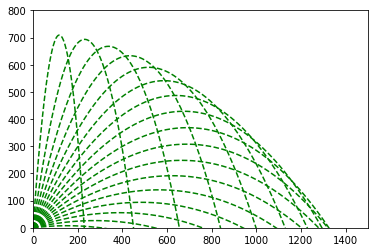

In [56]:

n_steps = 1000
thetas = range(5, 90, 5) 



initial_conditions=[[0,0,v0*numpy.cos(theta),v0*numpy.sin(theta)]for theta in thetas]
print(len(initial_conditions))

values_euler=numpy.zeros(17)

for i in thetas:
    i=i*(1/360)*2*numpy.pi
    vx=v0*numpy.cos(i)
    vy=v0*numpy.sin(i)
    initial_conditions=[0,0,vx,vy]
    values_euler=solve_euler(initial_conditions, 300, n_steps)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler,ys_euler, color='green',linestyle='--')
    




plt.xlim(0,1500)
plt.ylim(0,800);

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [ ]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here
y=numpy.zeros((1001,4))
x=numpy.zeros(len(v0s))
for i in range len(v0s):
    y[i]=solve_euler([0,0,v0s[i]*numpy.cos(theta),v0s[i]*numpy.sin(theta)],300,n_steps)
    x=find_range(y[i])



#def no_resistance(initial_conditions,max_time,n_steps):
   # time_flight=2*initial_conditions[3]/g
   # range_x=intial_conditions[2]*time_flight
   # return range_x

#ranges=[find_range(trajectories[i])for i in range(v0s)]
#ranges_noresistance=numpy.array([no_resistance])